# Getting started

The following tutorial shows how to use the package to calculate various codon usage bias scores for gene sequences.

In [1]:
import codonbias as cb

## Load sequences

Loading sequences is just a matter of converting them to a list of Python strings. For example, the following code loads the sequences of *E. coli* genes from a FASTA file using the Python package Biopython. You can use any other package for that matter, or any other source for the sequences, as long as in the end they are converted to a list of strings.

In [2]:
from Bio.SeqIO import parse

fasta = parse('Escherichia_coli_str_k_12_substr_mg1655.ASM584v2.cds.all.fa', 'fasta')
genes = [str(record.seq) for record in fasta]

## Initialize a codon bias model

Next, every codon model (also called *score* in the package) is a class that can be initialized with various parameters, or used with its default parameters (see the documentation of each score). For example, here we initialize the Effective Number of Codons (ENC) score. By default, the variant proposed by Sun, Yang & Xia (MBE, 2013) is used.

In [3]:
enc = cb.scores.EffectiveNumberOfCodons()

Or, we could add background-correction to the model, as proposed by (Novembre, MBE 2002).

In [4]:
enc = cb.scores.EffectiveNumberOfCodons(bg_correction=True)

The rest of the models in the `codonbias.scores` module are initialized in a similar way.

## Compute gene scores

Now, once it's initialized, we can give the ENC model the *E. coli* sequences and get a score for each gene.

In [5]:
gene_scores = enc.get_score(genes)

## Compute positional weights

For some scores, we could calculate a score for each codon in the sequence. For example, here is a meta-gene analysis of the first 100 codons in each gene of the *E. coli* genome using the weights of the Codon Adaptation Index (CAI) model.

In [6]:
cai = cb.scores.CodonAdaptationIndex(ref_seq=genes)

In [7]:
gene_vecs = cai.get_vector(genes, slice=slice(3, 300), pad=True)  # skip the START codon

Text(0.5, 1.0, 'metagene plot of CAI weights')

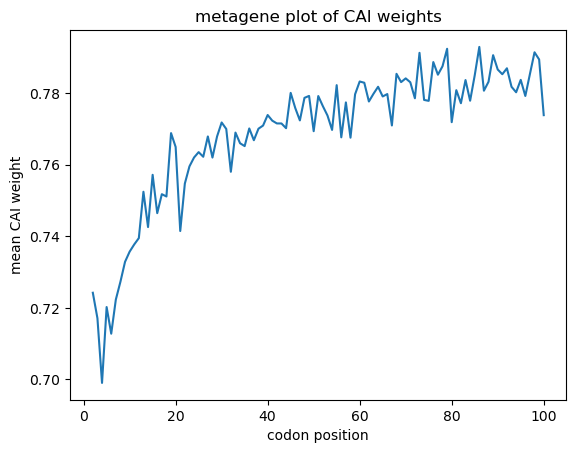

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.arange(2, 101), np.nanmean(gene_vecs, axis=0))
plt.xlabel('codon position')
plt.ylabel('mean CAI weight')
plt.title('metagene plot of CAI weights')